<a href="https://colab.research.google.com/github/courtneynguyen/Kenyon-College_IPHS_Cultural-Analytics/blob/main/%5B2022_11_15%5DTwitter_Following_Scrape_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# REST URL ONLY: Scrape Twitter for US Governors in 2022 Mid-Terms

# Setup

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests
import json
from pprint import pprint

In [11]:
import tweepy
import gc #collecting garbage
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator #visualisation

sns.set_theme(context='notebook', style='whitegrid', palette='vlag', font='serif')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Get Data

In [12]:
!wget https://raw.githubusercontent.com/courtneynguyen/scrape-twitter-following/main/result.csv

--2022-12-15 20:13:14--  https://raw.githubusercontent.com/courtneynguyen/scrape-twitter-following/main/result.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2022-12-15 20:13:14 ERROR 404: Not Found.



In [13]:
!wget https://raw.githubusercontent.com/courtneynguyen/scrape-twitter-following/main/belfort.csv

--2022-12-15 20:13:14--  https://raw.githubusercontent.com/courtneynguyen/scrape-twitter-following/main/belfort.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23741 (23K) [text/plain]
Saving to: ‘belfort.csv.1’

belfort.csv.1       100%[===================>]  23.18K  --.-KB/s    in 0.001s  

2022-12-15 20:13:14 (15.5 MB/s) - ‘belfort.csv.1’ saved [23741/23741]



In [14]:
!wget https://raw.githubusercontent.com/courtneynguyen/scrape-twitter-following/main/blankfein.csv

--2022-12-15 20:13:14--  https://raw.githubusercontent.com/courtneynguyen/scrape-twitter-following/main/blankfein.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1229 (1.2K) [text/plain]
Saving to: ‘blankfein.csv.1’

blankfein.csv.1     100%[===================>]   1.20K  --.-KB/s    in 0s      

2022-12-15 20:13:14 (21.7 MB/s) - ‘blankfein.csv.1’ saved [1229/1229]



In [15]:
!wget https://raw.githubusercontent.com/courtneynguyen/scrape-twitter-following/main/dalio.csv

--2022-12-15 20:13:14--  https://raw.githubusercontent.com/courtneynguyen/scrape-twitter-following/main/dalio.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3406 (3.3K) [text/plain]
Saving to: ‘dalio.csv.1’

dalio.csv.1         100%[===================>]   3.33K  --.-KB/s    in 0s      

2022-12-15 20:13:14 (41.5 MB/s) - ‘dalio.csv.1’ saved [3406/3406]



In [16]:
!wget https://raw.githubusercontent.com/courtneynguyen/scrape-twitter-following/main/cahn.csv

--2022-12-15 20:13:14--  https://raw.githubusercontent.com/courtneynguyen/scrape-twitter-following/main/cahn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3984 (3.9K) [text/plain]
Saving to: ‘cahn.csv.1’

cahn.csv.1          100%[===================>]   3.89K  --.-KB/s    in 0s      

2022-12-15 20:13:14 (52.0 MB/s) - ‘cahn.csv.1’ saved [3984/3984]



In [17]:
bloomberg_df = pd.read_csv('result.csv', index_col=[0])
bloomberg_df.head()
bloomberg_df.info()

,name,username
id,,
68911475,Asian Development Bank,ADB_HQ
16300314,Asia Society,AsiaSociety
1351716580720316417,Special Presidential Envoy John Kerry,ClimateEnvoy
981314794836955136,Defense Innovation Board,InnovationBoard
2923724679,UN Youth Envoy,UNYouthEnvoy


<class 'pandas.core.frame.DataFrame'>
Int64Index: 716 entries, 68911475 to 21457205
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      716 non-null    object
 1   username  716 non-null    object
dtypes: object(2)
memory usage: 16.8+ KB


In [18]:
bloomberg_df['to'] = bloomberg_df.index
bloomberg_following_df = bloomberg_df.copy(deep=True)
bloomberg_following_df['from'] = 16581604
bloomberg_following_df.head()

,name,username,to,from
id,,,,
68911475,Asian Development Bank,ADB_HQ,68911475,16581604
16300314,Asia Society,AsiaSociety,16300314,16581604
1351716580720316417,Special Presidential Envoy John Kerry,ClimateEnvoy,1351716580720316417,16581604
981314794836955136,Defense Innovation Board,InnovationBoard,981314794836955136,16581604
2923724679,UN Youth Envoy,UNYouthEnvoy,2923724679,16581604


In [19]:
belfort_df = pd.read_csv('belfort.csv', index_col=[0])
belfort_df.head()
belfort_df.info()

,name,username
id,,
11247222,Timothy Sykes,timothysykes
1536623865602134016,Gossamer,Gossamer_world
1450805517186519044,Jack Lu,0xLeoInRio
188369814,Jim Bianco biancoresearch.eth,biancoresearch
467535591,Bearica Wall 🇧🇸,ercwl


<class 'pandas.core.frame.DataFrame'>
Int64Index: 633 entries, 11247222 to 1539471
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      633 non-null    object
 1   username  633 non-null    object
dtypes: object(2)
memory usage: 14.8+ KB


In [20]:
belfort_df['to'] = belfort_df.index
belfort_following_df = belfort_df.copy(deep=True)
belfort_following_df['from'] = 17454086
belfort_following_df.head()

,name,username,to,from
id,,,,
11247222,Timothy Sykes,timothysykes,11247222,17454086
1536623865602134016,Gossamer,Gossamer_world,1536623865602134016,17454086
1450805517186519044,Jack Lu,0xLeoInRio,1450805517186519044,17454086
188369814,Jim Bianco biancoresearch.eth,biancoresearch,188369814,17454086
467535591,Bearica Wall 🇧🇸,ercwl,467535591,17454086


In [21]:
blankfein_df = pd.read_csv('blankfein.csv', index_col=[0])
blankfein_df.head()
blankfein_df.info()

,name,username
id,,
1587969963897356288,Dave Gardiner,DaveGar59039036
932630991298007041,litquidity,litcapital
5763262,Kara Swisher,karaswisher
357606935,Elizabeth Warren,ewarren
579792548,David Armitage 🇺🇦 @DavidRArmitage@masto.ai,DavidRArmitage


<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 1587969963897356288 to 1360231099
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      33 non-null     object
 1   username  33 non-null     object
dtypes: object(2)
memory usage: 792.0+ bytes


In [22]:
blankfein_df['to'] = blankfein_df.index
blankfein_following_df = blankfein_df.copy(deep=True)
blankfein_following_df['from'] = 313381067
blankfein_following_df.head()

,name,username,to,from
id,,,,
1587969963897356288,Dave Gardiner,DaveGar59039036,1587969963897356288,313381067
932630991298007041,litquidity,litcapital,932630991298007041,313381067
5763262,Kara Swisher,karaswisher,5763262,313381067
357606935,Elizabeth Warren,ewarren,357606935,313381067
579792548,David Armitage 🇺🇦 @DavidRArmitage@masto.ai,DavidRArmitage,579792548,313381067


In [23]:
dalio_df = pd.read_csv('dalio.csv', index_col=[0])
dalio_df.head()
dalio_df.info()

,name,username
id,,
16465385,The Nobel Prize,NobelPrize
49749731,Grameen America,GrameenAmerica
267921808,Robin Roberts,RobinRoberts
1314006455897518081,Dalio Philanthropies,DalioDotOrg
772493970,Eric S. Yuan (he / him / his),ericsyuan


<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 16465385 to 50393960
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      93 non-null     object
 1   username  93 non-null     object
dtypes: object(2)
memory usage: 2.2+ KB


In [24]:
dalio_df['to'] = dalio_df.index
dalio_following_df = dalio_df.copy(deep=True)
dalio_following_df['from'] = 62603893
dalio_following_df.head()

,name,username,to,from
id,,,,
16465385,The Nobel Prize,NobelPrize,16465385,62603893
49749731,Grameen America,GrameenAmerica,49749731,62603893
267921808,Robin Roberts,RobinRoberts,267921808,62603893
1314006455897518081,Dalio Philanthropies,DalioDotOrg,1314006455897518081,62603893
772493970,Eric S. Yuan (he / him / his),ericsyuan,772493970,62603893


In [25]:
cahn_df = pd.read_csv('cahn.csv', index_col=[0])
cahn_df.head()
cahn_df.info()

,name,username
id,,
1908078548,Rich Handler,HandlerRich
29515247,Melissa Francis,MelissaAFrancis
13416712,Adam Lashinsky,adamlashinsky
436990599,Paul Hodgson,pghwrites
74130577,Emily Chang,emilychangtv


<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 1908078548 to 263197731
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      108 non-null    object
 1   username  108 non-null    object
dtypes: object(2)
memory usage: 2.5+ KB


In [26]:
cahn_df['to'] = cahn_df.index
cahn_following_df = cahn_df.copy(deep=True)
cahn_following_df['from'] = 1534167900
cahn_following_df.head()

,name,username,to,from
id,,,,
1908078548,Rich Handler,HandlerRich,1908078548,1534167900
29515247,Melissa Francis,MelissaAFrancis,29515247,1534167900
13416712,Adam Lashinsky,adamlashinsky,13416712,1534167900
436990599,Paul Hodgson,pghwrites,436990599,1534167900
74130577,Emily Chang,emilychangtv,74130577,1534167900


# Get OAuth Tokens

In [27]:
#import config_twitter

#api_key = config_twitter.API_KEY #Your API/Consumer key 
#api_secret = config_twitter.API_KEY_SECRET #Your API/Consumer Secret Key
bearer_token = 'AAAAAAAAAAAAAAAAAAAAAN3sJAEAAAAA8apzlrSf0L2kyjdEnLW95ddrpcI%3D2jcSTsCamaHi79EvdFK6RXAh674EmGf6G5LJdXZ4JIXgQpFRJC' # Your API/Bearer Token
#access_token = config_twitter.ACCESS_TOKEN    #Your Access token key
#access_token_secret = config_twitter.ACCESS_TOKEN_SECRET #Your Access token Secret key

# Network Analysis

In [28]:
!pip install pyvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 748 kB 5.3 MB/s 
     |████████████████████████████████| 40 kB 3.8 MB/s 
     |████████████████████████████████| 1.6 MB 14.1 MB/s 
  Created wheel for pyvis: filename=pyvis-0.3.1-py3-none-any.whl size=755850 sha256=287411f9c96aed5e630776ba9718b6615f87dc4455c208f1c9297d08812ac259
  Stored in directory: /root/.cache/pip/wheels/a4/0c/61/8469ca276f96ab772c3acc7f47d71e9737cbdf6f446f017f48
Successfully built pyvis


In [32]:
# packages

# standard
import numpy as np
import pandas as pd
import time

# plots
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# graph
import networkx as nx
from pyvis.network import Network

AttributeError: ignored

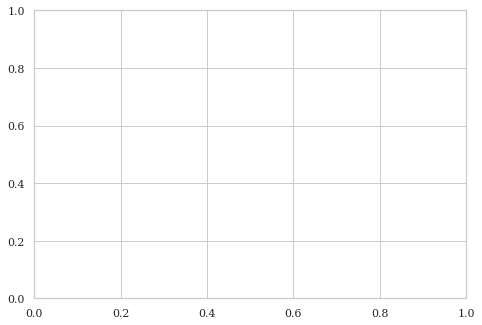

In [43]:
# create graph from edges
G = nx.from_pandas_edgelist(bloomberg_following_df, 'from', 'to', create_using=nx.DiGraph())
# and plot
nx.draw(G, with_labels=True, node_size=1000, alpha=0.5, arrows=True)
plt.title('Targets that ' + str(follower) + ' follows')
plt.show()

In [34]:
bloomberg_following_ls = bloomberg_following_df['to'].to_list()
len(bloomberg_following_ls)
bloomberg_following_ls[:5]

716

[68911475, 16300314, 1351716580720316417, 981314794836955136, 2923724679]

In [35]:
belfort_following_ls = belfort_following_df['to'].to_list()
len(belfort_following_ls)
belfort_following_ls[:5]

633

[11247222, 1536623865602134016, 1450805517186519044, 188369814, 467535591]

In [36]:
blankfein_following_ls = blankfein_following_df['to'].to_list()
len(blankfein_following_ls)
blankfein_following_ls[:5]

33

[1587969963897356288, 932630991298007041, 5763262, 357606935, 579792548]

In [37]:
dalio_following_ls = dalio_following_df['to'].to_list()
len(dalio_following_ls)
dalio_following_ls[:5]

93

[16465385, 49749731, 267921808, 1314006455897518081, 772493970]

In [38]:
cahn_following_ls = cahn_following_df['to'].to_list()
len(cahn_following_ls)
cahn_following_ls[:5]

108

[1908078548, 29515247, 13416712, 436990599, 74130577]

In [39]:
bb_following_ls = list(set(bloomberg_following_ls).intersection(set(dalio_following_ls)))
len(bb_following_ls)
bb_following_ls

14

[1333171793201225728,
 21982720,
 1364930179,
 19506790,
 17220934,
 50393960,
 313381067,
 12,
 8161232,
 93957809,
 6708952,
 19397785,
 236526490,
 1534167900]